In [10]:
import os
import time 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error,mean_absolute_error, f1_score
import lightgbm as lgb
import xgboost as xgb
from tqdm import tqdm_notebook
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.linear_model import BayesianRidge as br
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import ElasticNet as en
from sklearn.kernel_ridge import KernelRidge as kr
from sklearn.model_selection import  KFold, StratifiedKFold,GroupKFold, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import logging
import warnings
warnings.filterwarnings('ignore') 

D:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
element = pd.read_csv("element.csv",encoding='latin-1') 
train = pd.read_csv("Medata/Ref8/train1.csv",encoding='latin-1') 
test = pd.read_csv("Medata/Ref8/test1.csv",encoding='latin-1') 
target_col = "Target"
y_train = train[target_col]
y_test = test[target_col]

,Mercury-urine (ng/mL),Barium-urine (ng/mL),Cadmium-urine (ng/mL),Cobalt-urine (ng/mL),Cesium-urine (ng/mL),Molybdenum-urine (ng/mL),Lead-urine (ng/mL),Antimony-urine (ng/mL),Thallium-urine (ng/mL),Tungsten-urine (ng/mL),Uranium-urinary (ug/L),Target
Mercury-urine (ng/mL),1.000000,0.232394,0.370631,0.283001,0.476678,0.385241,0.349866,0.303126,0.451318,0.342718,0.261930,0.028973
Barium-urine (ng/mL),0.232394,1.000000,0.187890,0.537775,0.423547,0.357353,0.373315,0.339921,0.383512,0.334486,0.314678,0.071304
Cadmium-urine (ng/mL),0.370631,0.187890,1.000000,0.365048,0.487064,0.366161,0.573958,0.386497,0.387613,0.257513,0.369267,-0.076098
Cobalt-urine (ng/mL),0.283001,0.537775,0.365048,1.000000,0.573917,0.541553,0.435500,0.456513,0.523429,0.439160,0.374233,0.039887
Cesium-urine (ng/mL),0.476678,0.423547,0.487064,0.573917,1.000000,0.586931,0.561780,0.505022,0.763340,0.417048,0.389479,0.018462
Molybdenum-urine (ng/mL),0.385241,0.357353,0.366161,0.541553,0.586931,1.000000,0.459446,0.508890,0.544656,0.613201,0.393386,0.009643
Lead-urine (ng/mL),0.349866,0.373315,0.573958,0.435500,0.561780,0.459446,1.000000,0.528896,0.449146,0.391617,0.406116,0.021864
Antimony-urine (ng/mL),0.303126,0.339921,0.386497,0.456513,0.505022,0.508890,0.528896,1.000000,0.474683,0.515858,0.452946,0.020281
Thallium-urine (ng/mL),0.451318,0.383512,0.387613,0.523429,0.763340,0.544656,0.449146,0.474683,1.000000,0.389212,0.334238,0.035700
Tungsten-urine (ng/mL),0.342718,0.334486,0.257513,0.439160,0.417048,0.613201,0.391617,0.515858,0.389212,1.000000,0.499915,0.004538


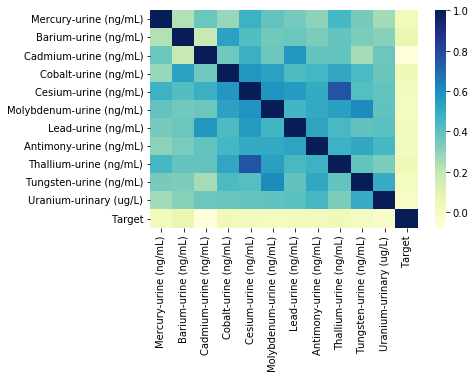

In [3]:
corr = element.corr(method='spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='YlGnBu')
corr

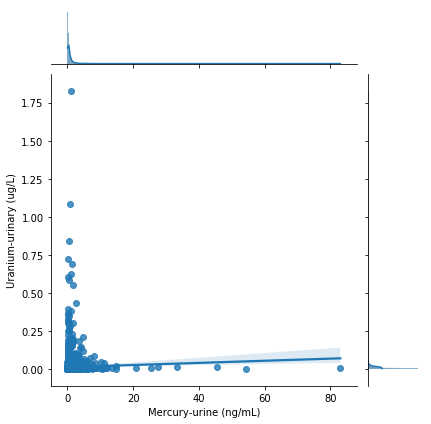

In [4]:
sns.jointplot(x = 'Mercury-urine (ng/mL)', y = 'Uranium-urinary (ug/L)', kind='reg', data = element)

In [5]:
import scipy.stats as stats

In [6]:
train_data_copy = train.copy() 
test_data_copy = test.copy() 
target = train_data_copy[target_col]
data1 = pd.concat([train_data_copy,test],axis=0,ignore_index=True)

In [7]:
del train_data_copy[target_col] #去除目标列
del test_data_copy[target_col]
data = pd.concat([train_data_copy,test_data_copy],axis=0,ignore_index=True)

In [8]:
train.Target.describe() #数据的基本信息

count    6895.000000
mean        1.886657
std         0.317087
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.300000
Name: Target, dtype: float64

In [9]:
use_feature = [clo for clo in data.columns]

In [10]:
train_shape = train.shape[0]
features = data[use_feature].columns
X_train_263 = data[:train_shape][use_feature].values
y_train = target
X_test_263 = data[train_shape:][use_feature].values
X_train_263.shape

(6895, 16)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [12]:
y = train['Target']
X = train.drop(['Target'], axis=1)
y.replace({1:0,2:1},inplace=True)

In [13]:
y1 = test['Target']
X1 = test.drop(['Target'], axis=1)
y1.replace({1:0,2:1},inplace=True)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify
import plotly.tools as tls

In [15]:
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

In [16]:
random_state=42

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [17]:
n_iter = 2

In [18]:
lgbm_clf = lgb.LGBMRegressor(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgb.LGBMRegressor(**opt_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [23]:
lgbm_clf = lgb.LGBMRegressor(**opt_parameters)

In [24]:
print(opt_parameters)

{'colsample_bytree': 0.6247240713084175, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_samples': 120, 'min_child_weight': 100.0, 'n_estimators': 2000, 'num_leaves': 24, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.5673991135726937}


In [30]:
model = lgbm_clf.fit(X, y) 

In [52]:
fit_pred1  = model.predict(X1)
y_test = np.asarray(y1)
print(fit_pred1)
import math
score = y_test-fit_pred1
#RMSE = math.sqrt((y_test-fit_pred1)^2)

[0.94263327 0.79231516 0.58432543 ... 0.97038922 0.82678952 0.76220103]


In [57]:
lst=[x**2 for x in score]
lst

[1.3394977545913902,
 0.04313299109357551,
 0.8384599097677841,
 0.017481343995671465,
 0.0008107570124015508,
 0.02362072083550443,
 0.04719916334279862,
 0.06343796588369609,
 0.00044823072507076524,
 0.667285842094485,
 0.007419553176740104,
 0.000868816930911198,
 0.02816565180357416,
 0.008327122578029235,
 3.251351308227771e-05,
 0.0011398114817862538,
 0.0061905295255960365,
 0.05662390182211328,
 0.006514091155837308,
 0.884180797436197,
 0.0022870666808797063,
 0.5851795568637406,
 0.7187036224825004,
 0.020551826034905664,
 0.0002926580649450178,
 0.011777654817525263,
 0.008962697689788331,
 0.006158907987386498,
 0.00010619640813063988,
 0.0010480861561021633,
 0.0003419255838218462,
 0.005715634363020567,
 0.47852821486301517,
 0.023239762357912502,
 6.371762041305882e-05,
 0.11835711206706241,
 0.0035168944040302385,
 0.11296618204466422,
 2.8882633234191542e-06,
 0.00027451446135697726,
 0.0364121897281669,
 0.00012707630264403703,
 0.004381875312429215,
 0.0006341106041

<Figure size 720x432 with 0 Axes>

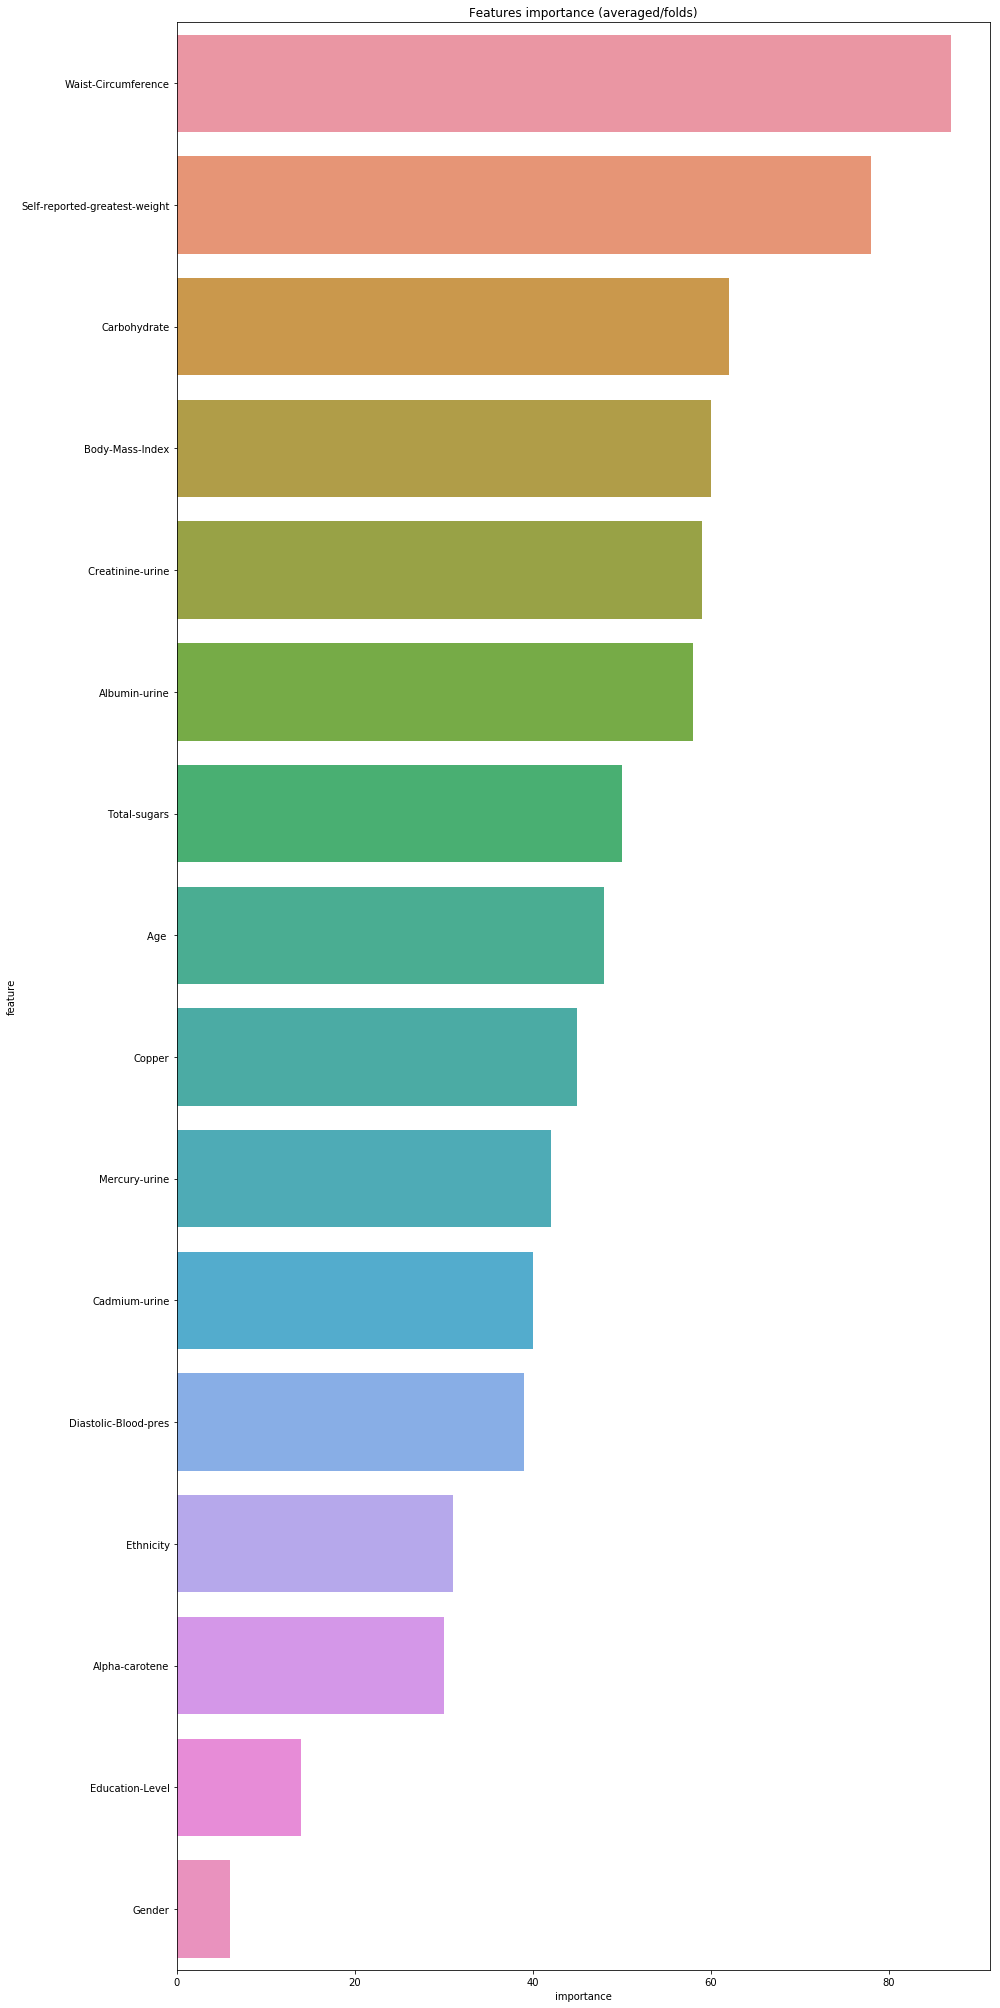

In [33]:
pd.set_option('display.max_columns', None)
plt.figure(figsize=(10, 6))
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
df = pd.DataFrame(X.columns.tolist(), columns=['feature'])
df['importance']=list(lgbm_clf.feature_importances_)
df = df.sort_values(by='importance',ascending=False)
plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="feature", data=df.head(100))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

In [97]:
# params 超参数设置
params = {'num_leaves': 20, 
'min_data_in_leaf': 30,              #叶子可能具有的最小记录数
'objective':'binary',
'max_depth': -1,
'learning_rate': 0.003,
"boosting": "gbdt",                  #用gbdt算法
"feature_fraction": 0.18,            #例如 0.18时，意味着在每次迭代中随机选择18％的参数来建树
"bagging_freq": 1,
"bagging_fraction": 0.55,             #每次迭代时用的数据比例
"bagging_seed": 14,
"metric": 'mse',
"lambda_l1": 0.9,
"lambda_l2": 0.8, 
"verbosity": -1
         }

In [ ]:
# 创建DataFrame保存特征重要性
feature_importances = pd.DataFrame(index=None)
feature_importances['features'] = X.columns

In [ ]:
# 5折交叉验证
folds = KFold(n_splits=10,shuffle=True,random_state=10)
splits = folds.split(X, y) # 分割成5份，前4份是训练集索引，最后1份是验证集索引
best_auc = 0
best_model = None
 
for fold, (train_indices, val_indices) in enumerate(splits):
    print('fold ', fold + 1)
    X_train_data, X_val_data = X.iloc[train_indices], X.iloc[val_indices] # 训练集， 验证集
    y_train, y_val = y.iloc[train_indices], y.iloc[val_indices] # 训练标签，验证标签
 
    
    train_dataset = lgb.Dataset(X_train_data, label=y_train) # 训练集
    val_dataset = lgb.Dataset(X_val_data, label=y_val) # 验证集
    
    lgb_model = lgb.train(params=params, # 超参数设置
                          train_set=train_dataset, # 训练数据
                          num_boost_round=1000, # 循环的轮数
                          valid_sets=val_dataset, # 验证数据
                          valid_names='validation', # 验证集名称
                          early_stopping_rounds=200,# 如果200轮后没有提升，就停止循环
                          verbose_eval=False) 
    # 保存特征重要性
    feature_importances[f'fold_{fold+1}'] = lgb_model.feature_importance()
    
    # 对验证集进行预测
    y_val_pred = lgb_model.predict(X_val_data)
    
    # 计算roc_auc
    roc_auc = roc_auc_score(y_val, y_val_pred)
    print(f" Fold {fold + 1} | AUC_ROC ： { roc_auc * 100}%")
    print(f"{'-'*50}\n")
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_model = lgb_model
    
    # 判断是否是最优模型

In [ ]:
best_auc

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_pred,pos_label=1)
roc_auc = auc(fpr,tpr)
roc_auc

In [ ]:
# 创建DataFrame保存特征重要性
feature_importances = pd.DataFrame(index=None)
feature_importances['features'] = X.columns

In [ ]:
pd.set_option('display.max_columns', None)
plt.figure(figsize=(10, 6))
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
df = pd.DataFrame(X.columns.tolist(), columns=['feature'])
df['importance']=list(lgb_model.feature_importance())
df = df.sort_values(by='importance',ascending=False)
plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="feature", data=df.head(80))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

In [53]:
from xgboost.sklearn import XGBClassifier

In [54]:
random_state = 42

In [55]:
xgbfit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'verbose': 0}
xgb_params = {
              'eta': [0.01,0.02,0.03,0.04,0.05, 0.08, 0.1, 0.2, 0.3, 0.4],  #lr
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],  
              'min_child_weight':[1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],#最小叶子节点样本权重和
              'gamma':[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08],#指定节点分裂所需的最小损失函数下降值。
              'subsample': sp_uniform(loc=0.2, scale=0.8),   #控制对于每棵树，随机采样的比例
              'colsample_bytree':sp_uniform(loc=0.4, scale=0.6),  #用来控制每棵随机采样的列数的占比 (每一列是一个特征)。
              'lambda':[0, 1e-1, 2, 5, 10, 20, 50, 100],
              'nthread': [-1,0,1,2]
                }

In [56]:
n_iter = 300

In [57]:
xgb_clf = xgb.XGBClassifier(random_state=random_state, n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=xgb_clf, param_distributions=xgb_params, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **xgbfit_params)
opt_parameters =  grid_search.best_params_


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


KeyboardInterrupt: 

In [ ]:
xgb_clf = xgb.XGBClassifier(**opt_parameters)

In [ ]:
print(opt_parameters)

In [ ]:
model2 = xgb_clf
subtitle = 'XGBoost'
    #Kfold
cv = KFold(n_splits=5,shuffle=True, random_state = 42)
oof_xgb_263 = np.zeros(len(X_train_263))
predictions_xgb_263 = np.zeros(len(X_test_263))
y_real = []
y_proba = []
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    model2.fit(X.iloc[train], y.iloc[train])
    pred_proba = model2.predict_proba(X.iloc[test])
    precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:,1])
    y_real.append(y.iloc[test])
    y_proba.append(pred_proba[:,1])
    fpr, tpr, t = roc_curve(y[test], pred_proba[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc) 
    #oof_xgb_263[test] = model2.predict(X_train_263[test])
    #predictions_xgb_263 = model2.predict(X_test_263)
    
    # Confusion matrix
y_pred = cross_val_predict(model2, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)
trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    
    #Show metrics
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
fp = conf_matrix[0,1]
tn = conf_matrix[0,0]
Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
Precision =  (tp/(tp+fp))
Recall    =  (tp/(tp+fn))
F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
show_metrics = show_metrics.T

colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #Roc curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

trace3 = go.Scatter(x=mean_fpr, y=mean_tpr,
                        name = "Roc : " ,
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),fill='tozeroy')
trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    #Precision - recall curve
y_real = y
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)

trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
mean_auc=round(mean_auc,3)
    #Subplots
fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(mean_auc)+')',
                                          'Precision - Recall curve',
                                          ))
    #Trace and layou

In [ ]:
py.iplot([trace3, trace4])

In [ ]:
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,2,1)
fig.append_trace(trace4,2,1)
fig.append_trace(trace5,2,2)
    
fig['layout'].update(showlegend = False, title = '<b>Model performance report (5 folds)</b><br>'+subtitle,
                        autosize = False, height = 830, width = 830,
                        margin = dict(b = 195), font=dict(color='black'))
fig["layout"]["xaxis1"].update(color = 'black')
fig["layout"]["yaxis1"].update(color = 'black')
fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'black')))
fig["layout"]["yaxis2"].update(color = 'black')
fig["layout"]["xaxis3"].update(dict(title = "false positive rate"), color = 'black')
fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'black')
fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'black')
fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'black')
for i in fig['layout']['annotations']:
    i['font'] = titlefont=dict(color='black', size = 14)
py.iplot(fig)

In [ ]:
scores_table(xgb_clf, 'XGBoost')

In [ ]:
from xgboost import plot_importance

In [ ]:
pd.set_option('display.max_columns', None)
plt.figure(figsize=(10, 6))
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
df = pd.DataFrame(X.columns.tolist(), columns=['feature'])
df['importance']=list(xgb_clf.feature_importances_)
df = df.sort_values(by='importance',ascending=False)
plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="feature", data=df.head(60))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

In [ ]:
random_state=42
rfcfit_params = {"sample_weight" : None}

rfcparam_test = {'n_estimators' : [10, 20, 30,40,50,60,70,80,90,100,120,140,160,180],
              'min_samples_split': sp_randint(1, 40), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'min_weight_fraction_leaf':[0,0.1,0.2,0.3,0.4,0.5]
             }

In [259]:
n_iter = 300

In [260]:
rfc_clf = RandomForestClassifier(random_state=random_state,criterion='entropy',n_jobs=4)

In [ ]:
grid_search = RandomizedSearchCV(
    estimator=rfc_clf, param_distributions=rfcparam_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **rfcfit_params)
opt_parameters =  grid_search.best_params_
rfc_clf = RandomForestClassifier(**opt_parameters)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [ ]:
print(opt_parameters)

In [ ]:
#GradientBoostingRegressor梯度提升决策树
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)
oof_gbr_263 = np.zeros(train_shape)
predictions_gbr_263 = np.zeros(len(X_test_263))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_263, y_train)):
    print("fold n°{}".format(fold_+1))
    tr_x = X_train_263[trn_idx]
    tr_y = y_train[trn_idx]
    gbr_263 = gbr(n_estimators=400, learning_rate=0.01,subsample=0.65,max_depth=7, min_samples_leaf=20,
            max_features=0.22,verbose=1)
    gbr_263.fit(tr_x,tr_y)
    oof_gbr_263[val_idx] = gbr_263.predict(X_train_263[val_idx])
    
    predictions_gbr_263 += gbr_263.predict(X_test_263) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_gbr_263, target)))

In [ ]:
#ExtraTreesRegressor 极端随机森林回归
folds = KFold(n_splits=5, shuffle=True, random_state=13)
oof_etr_263 = np.zeros(train_shape)
predictions_etr_263 = np.zeros(len(X_test_263))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_263, y_train)):
    print("fold n°{}".format(fold_+1))
    tr_x = X_train_263[trn_idx]
    tr_y = y_train[trn_idx]
    etr_263 = etr(n_estimators=1000,max_depth=8, min_samples_leaf=12, min_weight_fraction_leaf=0.0,
            max_features=0.4,verbose=1,n_jobs=-1)# max_feature：划分时考虑的最大特征数
    etr_263.fit(tr_x,tr_y)
    oof_etr_263[val_idx] = etr_263.predict(X_train_263[val_idx])
    
    predictions_etr_263 += etr_263.predict(X_test_263) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_etr_263, target)))

In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=13)
oof_en_263 = np.zeros(train_shape)
predictions_en_263 = np.zeros(len(X_test_263))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_263, y_train)):
    print("fold n°{}".format(fold_+1))
    tr_x = X_train_263[trn_idx]
    tr_y = y_train[trn_idx]
    #ElasticNet 弹性网络
    en_263 = en(alpha=1.0,l1_ratio=0.06)
    en_263.fit(tr_x,tr_y)
    oof_en_263[val_idx] = en_263.predict(X_train_263[val_idx])
    
    predictions_en_263 += en_263.predict(X_test_263) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_en_263, target)))

至此，我们得到了以上5种模型的预测结果以及模型架构及参数。其中在每一种特征工程中，进行5折的交叉验证，并重复两次（Kernel Ridge Regression，核脊回归），取得每一个特征数下的模型的结果。

In [ ]:
train_stack2 = np.vstack([oof_lgb_263,oof_xgb_263,oof_gbr_263,oof_rfr_263,oof_etr_263]).transpose()
# transpose()函数的作用就是调换x,y,z的位置,也就是数组的索引值
test_stack2 = np.vstack([predictions_lgb_263, predictions_xgb_263,predictions_gbr_263,predictions_rfr_263,predictions_etr_263]).transpose()

#交叉验证:5折，重复2次
folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=7)
oof_stack2 = np.zeros(train_stack2.shape[0])
predictions_lr2 = np.zeros(test_stack2.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack2,target)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack2[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack2[val_idx], target.iloc[val_idx].values
    #Kernel Ridge Regression
    lr2 = kr()
    lr2.fit(trn_data, trn_y)
    
    oof_stack2[val_idx] = lr2.predict(val_data)
    predictions_lr2 += lr2.predict(test_stack2) / 10
    
mean_squared_error(target.values, oof_stack2) 

In [ ]:
##### lgb_49
lgb_49_param = {
'num_leaves': 9,
'min_data_in_leaf': 23,
'objective':'regression',
'max_depth': -1,
'learning_rate': 0.002,
"boosting": "gbdt",
"feature_fraction": 0.45, 
"bagging_freq": 1,
"bagging_fraction": 0.65, 
"bagging_seed": 15,
"metric": 'mse',
"lambda_l2": 0.2, 
"verbosity": -1} # 一个叶子上数据的最小数量 \ feature_fraction将会在每棵树训练之前选择 45% 的特征。可以用来加速训练，可以用来处理过拟合。 #bagging_fraction不进行重采样的情况下随机选择部分数据。可以用来加速训练，可以用来处理过拟合。
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=9)   
oof_lgb_49 = np.zeros(len(X_train_49))
predictions_lgb_49 = np.zeros(len(X_test_49))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_49, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = lgb.Dataset(X_train_49[trn_idx], y_train[trn_idx])
    val_data = lgb.Dataset(X_train_49[val_idx], y_train[val_idx])

    num_round = 12000
    lgb_49 = lgb.train(lgb_49_param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof_lgb_49[val_idx] = lgb_49.predict(X_train_49[val_idx], num_iteration=lgb_49.best_iteration)
    predictions_lgb_49 += lgb_49.predict(X_test_49, num_iteration=lgb_49.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb_49, target)))

In [ ]:
##### xgb_49
xgb_49_params = {'eta': 0.02, 
              'max_depth': 5, 
              'min_child_weight':3,
              'gamma':0,
              'subsample': 0.7, 
              'colsample_bytree': 0.35, 
              'lambda':2,
              'objective': 'reg:linear', 
              'eval_metric': 'rmse', 
              'silent': True, 
              'nthread': -1}


folds = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_xgb_49 = np.zeros(len(X_train_49))
predictions_xgb_49 = np.zeros(len(X_test_49))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_49, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = xgb.DMatrix(X_train_49[trn_idx], y_train[trn_idx])
    val_data = xgb.DMatrix(X_train_49[val_idx], y_train[val_idx])

    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    xgb_49 = xgb.train(dtrain=trn_data, num_boost_round=3000, evals=watchlist, early_stopping_rounds=600, verbose_eval=500, params=xgb_49_params)
    oof_xgb_49[val_idx] = xgb_49.predict(xgb.DMatrix(X_train_49[val_idx]), ntree_limit=xgb_49.best_ntree_limit)
    predictions_xgb_49 += xgb_49.predict(xgb.DMatrix(X_test_49), ntree_limit=xgb_49.best_ntree_limit) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb_49, target)))

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)
oof_gbr_49 = np.zeros(train_shape)
predictions_gbr_49 = np.zeros(len(X_test_49))
#GradientBoostingRegressor梯度提升决策树
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_49, y_train)):
    print("fold n°{}".format(fold_+1))
    tr_x = X_train_49[trn_idx]
    tr_y = y_train[trn_idx]
    gbr_49 = gbr(n_estimators=600, learning_rate=0.01,subsample=0.65,max_depth=6, min_samples_leaf=20,
            max_features=0.35,verbose=1)
    gbr_49.fit(tr_x,tr_y)
    oof_gbr_49[val_idx] = gbr_49.predict(X_train_49[val_idx])
    
    predictions_gbr_49 += gbr_49.predict(X_test_49) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_gbr_49, target)))

In [ ]:
train_stack3 = np.vstack([oof_lgb_49,oof_xgb_49,oof_gbr_49]).transpose()
test_stack3 = np.vstack([predictions_lgb_49, predictions_xgb_49,predictions_gbr_49]).transpose()
#
folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=7)
oof_stack3 = np.zeros(train_stack3.shape[0])
predictions_lr3 = np.zeros(test_stack3.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack3,target)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack3[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack3[val_idx], target.iloc[val_idx].values
        #Kernel Ridge Regression
    lr3 = kr()
    lr3.fit(trn_data, trn_y)
    
    oof_stack3[val_idx] = lr3.predict(val_data)
    predictions_lr3 += lr3.predict(test_stack3) / 10
    
mean_squared_error(target.values, oof_stack3) 
